# Graded Challenge 3
Muhammad Ikhsan Rahman Hakim - FTDS001

Dataset yang digunakan adalah Kickstarter, yakni sebuah startup yang mendanai berbagai macam project dengan cara crowdfunding. Di sini saya ingin mencari tahu hubungan antara *backers* atau donatur project dengan status projek.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

## Data Loading

In [2]:
df = pd.read_csv("ks-projects-201801.csv")

Di bagian ini saya akan fokus untuk mendapatkan *basic insight* dari data, untuk mendapatkan gambaran umum tentang apa yang sedang dikerjakan. 

In [3]:
#Untuk mendapatkan dimensi dataset dan 5 baris pertama dari dataset
print('Dimension of the dataset:', df.shape)
df.head()

Dimension of the dataset: (378661, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Dengan .info() kita dapat langsung melihat kolom yang tidak memiliki nilai (*missing value*). Kolom 'name' dan 'usd_pledge' memiliki *missing value*, sementara yang lainnya tidak.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


## Data Cleaning
Proses pembersihan dataset dari *missing value*, menghapus kolom yang tidak dibutuhkan dsb.

In [5]:
#mendeteksi jumlah missing value dari tiap kolom
df.isnull().sum().sort_values(ascending = False)

usd pledged         3797
name                   4
ID                     0
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Dari penelusuran sebelumnya, terlihat bahwa kolom 'name' dan 'usd pledged' memiliki nilai kosong. Maka, saya memutuskan untuk menghilangkan kolom 'usd pledged' dan menggunakan kolom 'usd_pledged_real' sebagai gantinya. Untuk kolom 'name', saya mengisi nilai yang kosong dengan 'Unknown project' karena hanya nama saja yang tidak memiliki nilai dan jumlahnya sedikit.

In [6]:
#fill missing name with "Unknown Project"
df['name'].fillna('Unknown project', inplace=True)

In [7]:
#drop 'usd pledged' column
df.drop(['usd pledged'], axis=1, inplace=True)

Saya hanya akan menggunakan data yang statusnya Successfull dan Failed, dan backers > 30 dan < 1000

In [45]:
df = df[(df['state'] == 'failed') | (df['state'] == 'successful')]
df = df[(df['backers'] < 1000) & (df['backers'] > 30)]

Berikut adalah kolom yang akan saya gunakan

In [47]:
dff = df.loc[:,['ID','name','category','main_category','state','backers']]
dff

,ID,name,category,main_category,state,backers
5,1000014025,Monarch Espresso Bar,Restaurants,Food,successful,224
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,failed,40
11,100005484,Lisa Lim New CD!,Indie Rock,Music,successful,100
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,successful,761
19,1000071625,Boco Tea,Food,Food,failed,40
...,...,...,...,...,...,...
378644,999934908,The Manual Bar Blade,Product Design,Design,successful,120
378645,999941823,The Chronicles of Erinoth - A Graphic Novel,Comics,Comics,failed,38
378646,999943841,The Dog Coffee Book,Children's Books,Publishing,successful,31
378651,999969812,AT THE BEACH,Classical Music,Music,successful,78


# Data exploration

## Central tendency

In [51]:
print("Mean: ",dff['backers'].mean())
print("Median: ",dff['backers'].median())
print("Modus: ",dff['backers'].mode()[0])
print("Std: ",dff['backers'].std())

Mean:  146.6461845791681
Median:  84.0
Modus:  31
Std:  162.44721983311905


## Measure of variance

In [101]:
q1,q2,q3 = np.percentile(dff['backers'],[25,50,75])

print("Nilai min : ",dff['backers'].min())
print("Nilai Q1(25%) : ",q1)
print("Nilai Q2(50%) : ",q2)
print("Nilai Q3(75%) : ",q3)
#print("Batas outlier: ",q3+1.5*(q3-q1))
print("Nilai max : ",dff['backers'].max())

Nilai min :  31
Nilai Q1(25%) :  50.0
Nilai Q2(50%) :  84.0
Nilai Q3(75%) :  167.0
Nilai max :  999


## Distribution and density

<AxesSubplot:ylabel='Frequency'>

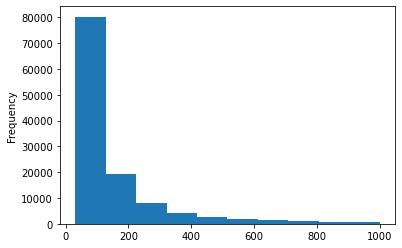

In [53]:
dff['backers'].plot.hist(bins=10)

In [98]:
pur_s = dff['backers'].skew()
pur_k = dff['backers'].kurt()
print('Backers skewness:', pur_s)
print('Backers kurtosis:', pur_k)

Backers skewness: 2.549752728086031
Backers kurtosis: 7.05521156983361


Dari nilai skewness dan kurtosis dapat diketahui distribusi backers adalah *right skewed* dengan puncak data(kurtosis) yang cukup tinggi.

Mari kita ringkas hasil distribusi data bakers dengan .describe()

In [106]:
df['backers'].describe()

count    120642.000000
mean        146.646185
std         162.447220
min          31.000000
25%          50.000000
50%          84.000000
75%         167.000000
max         999.000000
Name: backers, dtype: float64

# Hypothesis testing

## Confidence interval

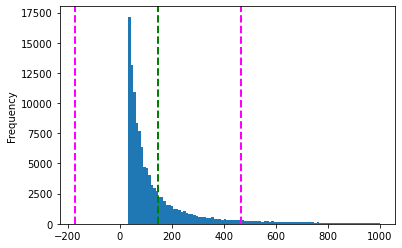

Mean: 146.6461845791681
StdErr: 162.44721983311905
95% Confidence Interval: (-171.74451568240602, 465.03688484074223)


In [71]:
ci = stats.norm.interval(0.95, dff['backers'].mean(), dff['backers'].std())


dff['backers'].plot.hist(bins=100) 
plt.axvline(dff['backers'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)
plt.show()

print ('Mean: ' + str(dff['backers'].mean()))
print ('StdErr: ' + str(dff['backers'].std()))
print ('95% Confidence Interval: ' + str(ci))

Mencari rata-rata Backers project yang sukses dan gagal.

In [105]:
df_success = dff[dff['state']=='successful']
df_fail = dff[(dff['state']=='failed')]

mean_suc = df_success['backers'].mean()
std_suc = df_success['backers'].std()
mean_fail = df_fail['backers'].mean()
std_fail = df_fail['backers'].std()

print('Success project mean: ',mean_succ)
print('Success project std: ',std_suc)
print('Fail project mean: ',mean_fail)
print('Fail project std: ',std_fail)

Success project mean:  160.38460271886223
Success project std:  171.91368875003525
Fail project mean:  89.76249520644254
Fail project std:  96.26450296775616


Disini akan diuji apakah H0 benar terbukti atau hanya kebetulan semata dikarenakan *random chance* (dengan critical value 0,05)
- H0: success mean = fail mean 
- H1: success mean != fail mean 

Success sample mean:165.0450235411858
Failed sample mean:87.88191404896648
t-statistic:3.5665341964586035
p-value:0.0004536042761262321


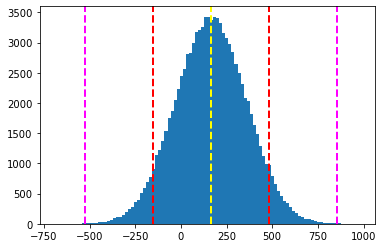

In [118]:
np.random.seed(123)
sucess = np.random.normal(mean_suc, std_suc, 100)
fail = np.random.normal(mean_fail, std_fail, 100)
print("Success sample mean:" + str(sucess.mean()))
print("Failed sample mean:" + str(fail.mean()))

# Independent T-Test
t,p = stats.ttest_ind(sucess, fail)

print("t-statistic:" + str(t))
print("p-value:" + str(p))

pop = np.random.normal(sucess.mean(), sucess.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, sucess.mean(), sucess.std())
plt.hist(pop, bins=100)

# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)

# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)

# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(pop.mean() - t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

Hasil yang didapat adalah P-value lebih kecil dari critical value(0,05). Maka dapat disimpulkan bahwa H0 dapat di*reject* dan H1 dapat diterima.


# Kesimpulan
Project yang sukses rata-rata memiliki 160 backers (donatur), sementara project yang gagal rata-rata memiliki backers < 90.